Dataset source = http://snap.stanford.edu/data/wiki-RfA.html <br>
Dataset title = "Wikipedia Requests for Adminship (with text)"<br>
Dataset public = Yes

#### Stats coming from dataset
(median/mean: 19/34 tokens)<br>
Nodes	10,835<br>
Edges	159,388<br>
Triangles	956,428<br>
Type of graph: Directed Signed Network

#### Dataset format
*Fields*<br>
SRC: user name of source, i.e., voter<br>
TGT: user name of target, i.e., the user running for election<br>
VOT: the source's vote on the target (-1 = oppose; 0 = neutral; 1 = support)<br>
RES: the outcome of the election (-1 = target was rejected as admin; 1 = target was accepted)<br>
YEA: the year in which the election was started<br>
DAT: the date and time of this vote<br>
TXT: the comment written by the source, in wiki markup<br>
<br>
<br>
*Example*<br>
SRC:Guettarda<br>
TGT:Lord Roem<br>
VOT:1<br>
RES:1<br>
YEA:2013<br>
DAT:19:53, 25 January 2013<br>
TXT:'''Support''' per [[WP:DEAL]]: clueful, and unlikely to break Wikipedia.<br>

In [ ]:
import networkx as nx
import  pickle
import pandas as pd
import numpy as np
import glob
import os
import re
from collections import Counter
import pylab as plt

First let's setup the directed graph instance.

In [15]:
G = nx.DiGraph()

Load dataset

In [16]:
files = glob.glob("./*.txt")
files

['.\\wiki-RfAv2.txt']

In [17]:
listWords = []
for file in files:
    with open(file, mode="r",encoding="utf-8") as f:
        content = f.read().splitlines()

srcNodes = []
count = 1
for text in content:
    count = count + 1
    if count == 1000: 
        count = 0
    textsp = re.split(r":::", text)
    if textsp[0] == 'TGT' or textsp[0] == 'SRC':
        srcNodes.append(textsp[1])

In [18]:
srcNodes[0:5]

['Steel1943', 'BDD', 'Cuchullain', 'BDD', 'INeverCry']

Lets get the number of unique nodes first by usig common

In [19]:
from collections import Counter
cntr = Counter(srcNodes)
result=cntr.most_common()

In [20]:
print("Unique nodes version 1 is ", len(result))

Unique nodes version 1 is  11381


Now let's do this via removing duplicates converting to a set

In [21]:
tst = set(result)
print(len(tst))

11381


In [22]:
print("Unique nodes version 2 is ",len(tst))

Unique nodes version 2 is  11381


In [23]:
content[0:5]

['SRC:::Steel1943', 'TGT:::BDD', 'VOT:::1', 'RES:::1', 'YEA:::2013']

Now let's build the graph

In [24]:
#Check if all the fields are present
DAT=""
RES=0
SRC=""
TGT=""
TXT=""
VOT=0
YEA=0
count = 1
tDat=[]
tRes=[]
tSrc=[]
tTgt=[]
tTxt=[]
tVot=[]
tYea=[]
for text in content:
    count = count +1
    textsp = re.split(r":::", text)
    if textsp[0] == 'DAT':
        DAT=textsp[1]
    if textsp[0] == 'RES':
        RES=textsp[1]
    if textsp[0] == 'SRC':
        SRC=textsp[1]
    if textsp[0] == 'TGT':
        TGT=textsp[1]
    if textsp[0] == 'TXT':
        G.add_edge(SRC, TGT)
        G[SRC][TGT]['VOT'] = VOT
        G[SRC][TGT]['RES'] = RES
        G[SRC][TGT]['YEA'] = YEA
        G[SRC][TGT]['DAT'] = DAT
        G[SRC][TGT]['TXT'] = textsp[1]
        tDat.append(DAT)
        tRes.append(RES)
        tSrc.append(SRC)
        tTgt.append(TGT)
        tTxt.append(textsp[1])
        tVot.append(VOT)
        tYea.append(YEA)
        DAT=""
        RES=0
        SRC=""
        TGT=""
        TXT=""
        VOT=0
        YEA=0
    if textsp[0] == 'VOT':
        VOT=textsp[1]
    if textsp[0] == 'YEA':
        YEA=textsp[1]
print(count)    

1586201


In [25]:
G.number_of_nodes()

11381

In [26]:
G.number_of_edges()

189003

In [16]:
pickle.dump( G, open( "fullGraph.pickle", "wb" ) )

In [27]:
G = pickle.load( open( "fullGraph.pickle", "rb" ) )

In [28]:
#nx.write_gexf(G, "fullGraph.gexf")

In [29]:
G.number_of_nodes()

11381

In [30]:
G.number_of_edges()

189003

In [31]:
tmplist = list(G.nodes())
print(tmplist[0:5])

['Steel1943', 'BDD', 'Cuchullain', 'INeverCry', 'Cncmaster']


Now let's prit an edge

In [32]:
tmp = list(G.edges.data())
print(tmp[0:1])

[('Steel1943', 'BDD', {'VOT': '1', 'RES': '1', 'YEA': '2013', 'DAT': '23:13, 19 April 2013', 'TXT': "'''Support''' as co-nom."})]


Now let's print a node

In [33]:
tmp = list(G.nodes.data())
print(tmp[0:1])

[('Steel1943', {})]


In [25]:
help(nx.algorithms)

Help on package networkx.algorithms in networkx:

NAME
    networkx.algorithms

PACKAGE CONTENTS
    approximation (package)
    assortativity (package)
    bipartite (package)
    boundary
    bridges
    centrality (package)
    chains
    chordal
    clique
    cluster
    coloring (package)
    communicability_alg
    community (package)
    components (package)
    connectivity (package)
    core
    covering
    cuts
    cycles
    dag
    distance_measures
    distance_regular
    dominance
    dominating
    efficiency
    euler
    flow (package)
    graphical
    hierarchy
    hybrid
    isolate
    isomorphism (package)
    link_analysis (package)
    link_prediction
    lowest_common_ancestors
    matching
    minors
    mis
    operators (package)
    reciprocity
    richclub
    shortest_paths (package)
    similarity
    simple_paths
    smetric
    structuralholes
    swap
    threshold
    tournament
    traversal (package)
    tree (package)
    triads
    vitality
  

In [26]:
def plot_degree_distribution(tG): 
    degs = {}
    for n in tG.nodes():
        deg = tG.degree(n) 
        if deg not in degs:
            degs[deg] = 0
        degs[deg] += 1
    items = sorted(degs.items())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot([k for (k,v) in items], [v for (k,v) in items]) 
    ax.set_xscale('log') 
    ax.set_yscale('log')
    plt.title("Wikipedia Degree Distribution") 
    fig.savefig("degree_distribution.png")

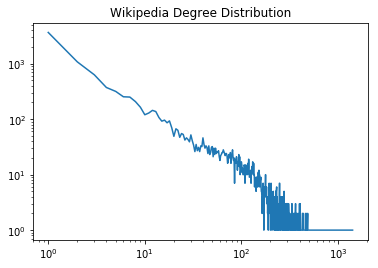

In [27]:
plot_degree_distribution(G)

To iterate

In [34]:
count = 1
for node in G.nodes():
    count = count+1
    if count == 10: break
    print(node, G.degree(node))

Steel1943 4
BDD 142
Cuchullain 65
INeverCry 133
Cncmaster 21
Miniapolis 158
Sven Manguard 129
Ramaksoud2000 6


In [35]:
#nx.draw(g)
#nx.draw_random(G)
#nx.draw_circular(G)
#nx.draw_spectral(G)

In [36]:
#nx.draw_random(G)

### Now we will build a table per attribute so we can build a datascience table

In [37]:
# All sizes must mach
print("All sizes must match")
print(len(tDat))
print(len(tRes))
print(len(tSrc))
print(len(tTgt))
print(len(tTxt))
print(len(tVot))
print(len(tYea))

All sizes must match
198275
198275
198275
198275
198275
198275
198275


We need to convert first the tables we will use as numeric

In [38]:
counter=0
for element in tRes:
    tRes[counter] = int(element)
    counter=counter+1

counter=0
for element in tVot:
    tVot[counter] = int(element)
    counter=counter+1

    

In [39]:
allTable=Table().with_columns(
    'SRC', tSrc,
    'TGT',tTgt,
    'VOT',tVot,
    'RES',tRes,
    'YEA',tYea,
    'DAT',tDat,
    'TXT',tTxt)

In [40]:
allTable

SRC,TGT,VOT,RES,YEA,DAT,TXT
Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.
Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--
INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.
Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contributor with ...
Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work with BDD at t ..."
Sven Manguard,BDD,1,1,2013,"01:53, 20 April 2013",'''Support''' There are plenty of important roles on thi ...
Ramaksoud2000,BDD,1,1,2013,"02:00, 20 April 2013",'''Support''' per noms. I don't see a reason not to.
RockMagnetist,BDD,1,1,2013,"02:18, 20 April 2013","'''Support''' BDD already wields a broom pretty well, s ..."
Carrite,BDD,1,1,2013,"02:22, 20 April 2013",'''Support''' barring a completely unexpected answer to ...
Someguy1221,BDD,1,1,2013,"03:09, 20 April 2013",'''Support''' because I see no good reason not to.


### Lets get some preliminary data

In [41]:
print("Vote Distribution")
voteDistribution = allTable.group('VOT')
voteDistribution

Vote Distribution


VOT,count
-1,41176
0,12648
1,144451


Visualizing vote distribution


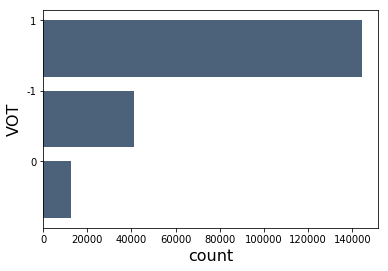

In [42]:
print("Visualizing vote distribution")
voteDistribution.sort('count', descending=True).barh('VOT')

In [43]:
print("User from source Distribution")
srcDistribution = allTable.group('SRC')
srcDistribution.sort('count', descending=True)

User from source Distribution


SRC,count
,1661
Siva1979,1232
Mailer diablo,998
Merovingian,916
Wizardman,810
Acalamari,726
Xoloz,677
Pedro,663
Dlohcierekim,661
Bearian,635


In [44]:
print("User from target Distribution")
tgtDistribution = allTable.group('TGT')
tgtDistribution.sort('count', descending=True)

User from target Distribution


TGT,count
Everyking,987
TenPoundHammer,778
MZMcBride,663
Cobi,639
Elonka,628
Ironholds,577
Kww,563
Werdna,540
Enigmaman,486
The Transhumanist,476


In [39]:
print("Result Distribution")
resDistribution = allTable.group('RES')
resDistribution

Result Distribution


RES,count
-1,74987
1,123288


Visualizing result distribution


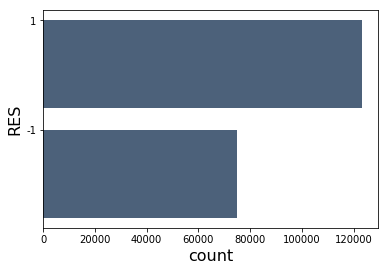

In [40]:
print("Visualizing result distribution")
resDistribution.sort('count', descending=True).barh('RES')

### Now in order to make analysis we need to convert usert to userid, for that let's make a map function.

In [45]:
# We already have tables of src and tgt. 
#Lets join them first because we need to include 
#all users, some of them might not be src or tgt

#'SRC', tSrc,
#'TGT',tTgt,
#'VOT',tVot,
#'RES',tRes,
#'YEA',tYea,
#'DAT',tDat,
#'TXT',tTxt)
tot = len(tSrc)+len(tTgt)
print("len of src = ", len(tSrc))
print("len of dst = ", len(tTgt))
print("After join the length we expect is", tot)
usersList = tSrc+ tTgt
print("Total lenght of joined table is ",len(usersList))

len of src =  198275
len of dst =  198275
After join the length we expect is 396550
Total lenght of joined table is  396550


Now, we will remove the duplicates by converting the list into a set

In [46]:
usersSet=set(usersList)

In [47]:
print("The total number of users is ",len(usersSet))

The total number of users is  11381


In [48]:
usersDictionary = dict()
a = enumerate(usersList)
for k,v in a:
    usersDictionary[v]=k

In [49]:
print("Example of the dictionary, in this case we will get the id of a user ",usersDictionary['Carrite'])

Example of the dictionary, in this case we will get the id of a user  201143


### We want to convert the users to numbers, thus users id, for this we need a function that will map the user to its numeric user id

In [50]:
def mapUsrIntoInt(x):
    return usersDictionary[x]

In [51]:
mapUsrIntoInt('Carrite')

201143

Lets use some magic of the datascience table. We will apply the function into SRC and TGT columns, making new ones with their respective user'ids

In [52]:
allTable = allTable.with_column(
    'SRCID', allTable.apply(mapUsrIntoInt, 'SRC')
)

In [53]:
allTable = allTable.with_column(
    'TGTID', allTable.apply(mapUsrIntoInt, 'TGT')
)

In [58]:
# Out of memory, here we dump memory first
pickle.dump( allTable, open( "allTableint.pickle", "w" ), protocol=4 )

MemoryError: 

In [ ]:
allTable = pickle.load( open( "fullGraph.pickle", "rb" ) )

In [50]:
allTable

SRC,TGT,VOT,RES,YEA,DAT,TXT,SRCID,TGTID
Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.,3108,198411
Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--,288770,198411
INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.,198804,198411
Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contributor with ...,3566,198411
Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work with BDD at t ...",199526,198411
Sven Manguard,BDD,1,1,2013,"01:53, 20 April 2013",'''Support''' There are plenty of important roles on thi ...,208026,198411
Ramaksoud2000,BDD,1,1,2013,"02:00, 20 April 2013",'''Support''' per noms. I don't see a reason not to.,17267,198411
RockMagnetist,BDD,1,1,2013,"02:18, 20 April 2013","'''Support''' BDD already wields a broom pretty well, s ...",200089,198411
Carrite,BDD,1,1,2013,"02:22, 20 April 2013",'''Support''' barring a completely unexpected answer to ...,201143,198411
Someguy1221,BDD,1,1,2013,"03:09, 20 April 2013",'''Support''' because I see no good reason not to.,240690,198411


In [51]:
def howManyWords(x):
    return len(x.split())

In [53]:
allTable = allTable.with_column(
    'numWords', allTable.apply(howManyWords, 'TXT')
)

In [54]:
allTable

SRC,TGT,VOT,RES,YEA,DAT,TXT,SRCID,TGTID,numWords
Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.,3108,198411,3
Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--,288770,198411,3
INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.,198804,198411,3
Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contributor with ...,3566,198411,21
Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work with BDD at t ...",199526,198411,35
Sven Manguard,BDD,1,1,2013,"01:53, 20 April 2013",'''Support''' There are plenty of important roles on thi ...,208026,198411,41
Ramaksoud2000,BDD,1,1,2013,"02:00, 20 April 2013",'''Support''' per noms. I don't see a reason not to.,17267,198411,10
RockMagnetist,BDD,1,1,2013,"02:18, 20 April 2013","'''Support''' BDD already wields a broom pretty well, s ...",200089,198411,109
Carrite,BDD,1,1,2013,"02:22, 20 April 2013",'''Support''' barring a completely unexpected answer to ...,201143,198411,109
Someguy1221,BDD,1,1,2013,"03:09, 20 April 2013",'''Support''' because I see no good reason not to.,240690,198411,9


Let's make a subset of the data set to do some scatter plots, so we can visualize patterns.

In [55]:
sampledTable = allTable.sample(k=500, with_replacement=False)

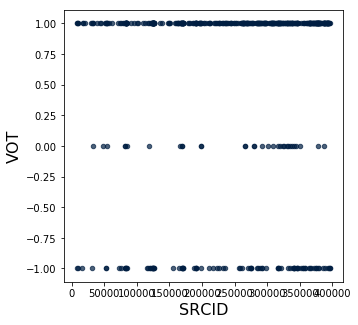

In [56]:
sampledTable.scatter('SRCID', 'VOT')

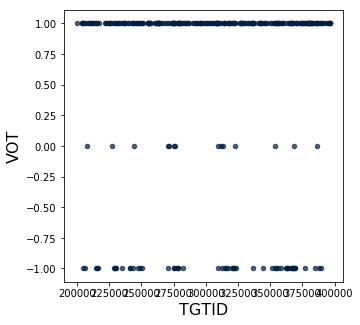

In [43]:
sampledTable.scatter('TGTID', 'VOT')

In [44]:
tab1 = sampledTable.select('SRCID', 'TGTID', 'VOT')
tab1

SRCID,TGTID,VOT
124692,300377,1
366416,290045,1
49172,241255,-1
336567,355563,1
285725,320964,-1
289056,287025,1
307830,379053,1
212954,230678,-1
386656,374501,1
332603,337594,1


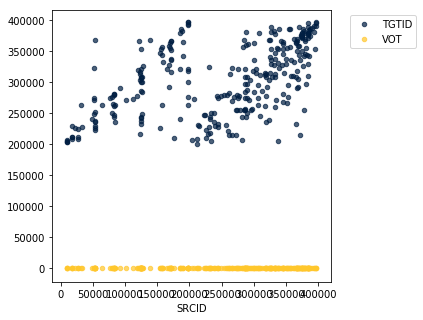

In [45]:
tab1.scatter('SRCID')

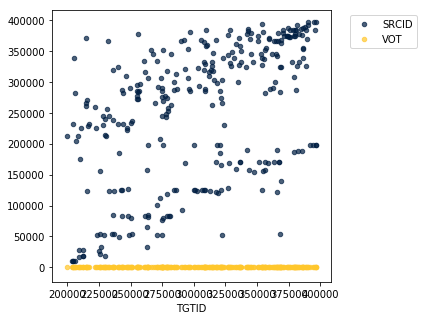

In [46]:
tab1.scatter('TGTID')

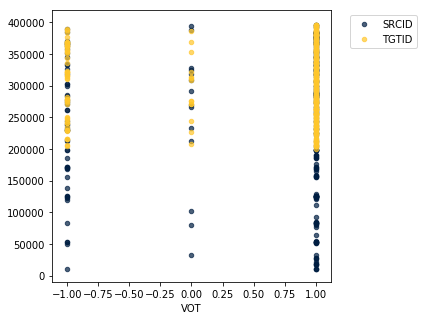

In [47]:
tab1.scatter('VOT')

In [56]:
tab2 = sampledTable.select('TGTID', 'VOT','RES')
tab2

TGTID,VOT,RES
300377,1,1
290045,1,1
241255,-1,1
355563,1,-1
320964,-1,-1
287025,1,1
379053,1,-1
230678,-1,-1
374501,1,1
337594,1,1


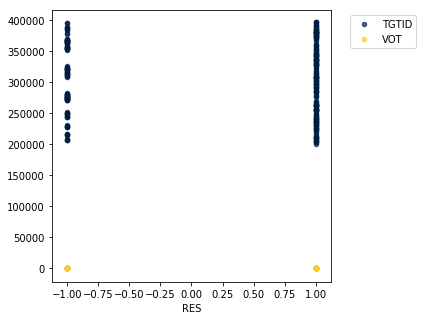

In [57]:
tab2.scatter('RES')

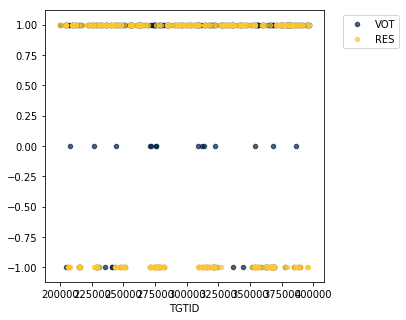

In [58]:
tab2.scatter('TGTID')

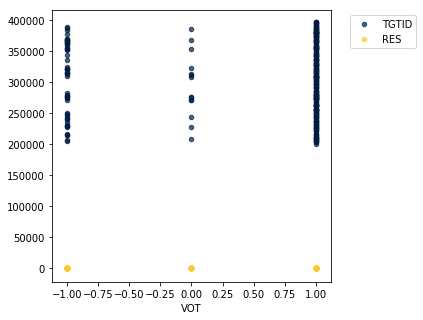

In [59]:
tab2.scatter('VOT')

In [71]:
nx.info(G, 'Miniapolis')

'Node Miniapolis has the following properties:\nDegree: 158\nNeighbors: BDD Bilby Darkwind INeverCry Jason Quinn Legoktm Lord Roem Mattythewhite Mkdw Nthep Ocaasi Paulmcdonald RockMagnetist Secret Shirt58 Tokyogirl79 West.andrew.g Ymblanter Banaticus Binksternet Carrite Dirtlawyer1 Jasper Deng Piotrus Pjoef Theopolisme Basalisk Bgwhite Harrias KTC Monty845 Sergecross73 TommyBoy Writ Keeper Σ Anbu121 Apteva Gigs Ktr101 LuK3 MONGO Northamerica1000 QuiteUnusual'

In [72]:
tmp = list(G.nodes.data())
print(tmp[0:1])

[('Steel1943', {})]


In [75]:
a=nx.all_neighbors(G, 'Steel1943')

In [77]:
G.in_degree('Steel1943')

0

In [78]:
G.out_degree('Steel1943')

4

In [79]:
allTable = allTable.with_column(
    'SCRIND', allTable.apply(G.in_degree, 'SRC')
)

In [81]:
allTable = allTable.with_column(
    'SCROUTD', allTable.apply(G.out_degree, 'SRC')
)

In [82]:
allTable = allTable.with_column(
    'TGTIND', allTable.apply(G.in_degree, 'TGT')
)

In [83]:
allTable = allTable.with_column(
    'TGTOUTD', allTable.apply(G.out_degree, 'TGT')
)

In [84]:
allTable

SRC,TGT,VOT,RES,YEA,DAT,TXT,SRCID,TGTID,SCRIND,SCROUTD,TGTIND,TGTOUTD
Steel1943,BDD,1,1,2013,"23:13, 19 April 2013",'''Support''' as co-nom.,3108,198411,0,4,137,5
Cuchullain,BDD,1,1,2013,"01:04, 20 April 2013",'''Support''' as nominator.--,288770,198411,63,2,137,5
INeverCry,BDD,1,1,2013,"23:43, 19 April 2013",'''Support''' per noms.,198804,198411,110,23,137,5
Cncmaster,BDD,1,1,2013,"00:11, 20 April 2013",'''Support''' per noms. BDD is a strong contributor with ...,3566,198411,0,21,137,5
Miniapolis,BDD,1,1,2013,"00:56, 20 April 2013","'''Support''', with great pleasure. I work with BDD at t ...",199526,198411,115,43,137,5
Sven Manguard,BDD,1,1,2013,"01:53, 20 April 2013",'''Support''' There are plenty of important roles on thi ...,208026,198411,32,97,137,5
Ramaksoud2000,BDD,1,1,2013,"02:00, 20 April 2013",'''Support''' per noms. I don't see a reason not to.,17267,198411,0,6,137,5
RockMagnetist,BDD,1,1,2013,"02:18, 20 April 2013","'''Support''' BDD already wields a broom pretty well, s ...",200089,198411,102,5,137,5
Carrite,BDD,1,1,2013,"02:22, 20 April 2013",'''Support''' barring a completely unexpected answer to ...,201143,198411,147,95,137,5
Someguy1221,BDD,1,1,2013,"03:09, 20 April 2013",'''Support''' because I see no good reason not to.,240690,198411,71,57,137,5


In [85]:
sampledTable2 = allTable.sample(k=300, with_replacement=False)

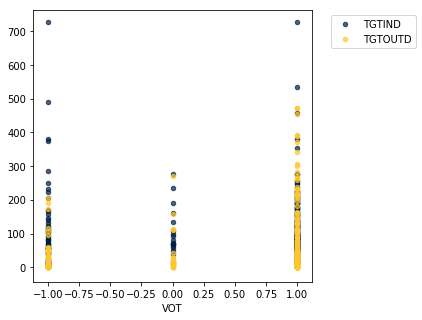

In [88]:
tab2_1 = sampledTable2.select('TGTIND', 'VOT', 'TGTOUTD')
tab2_1.scatter('VOT')

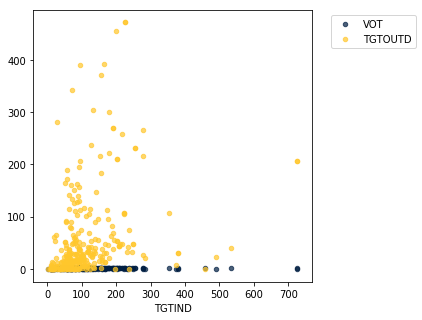

In [89]:
tab2_1.scatter('TGTIND')

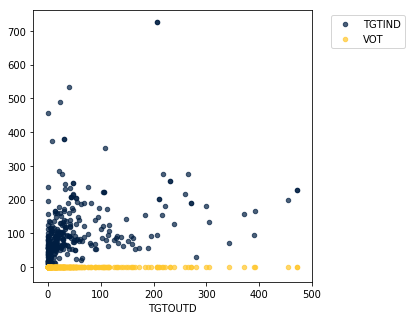

In [90]:
tab2_1.scatter('TGTOUTD')

In [97]:
tab2_2 = sampledTable2.select('SCROUTD', 'VOT', 'SCRIND')

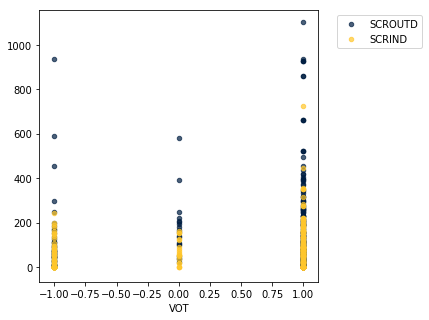

In [99]:
# *********. finding!!! see how less srcout/in have the ones that vote no
tab2_2.scatter('VOT')

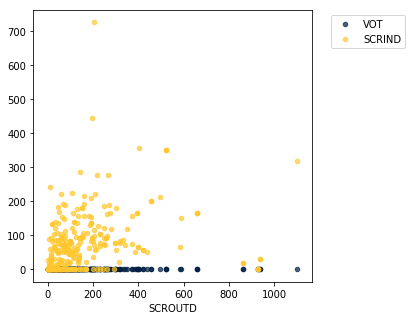

In [101]:
tab2_2.scatter('SCROUTD')

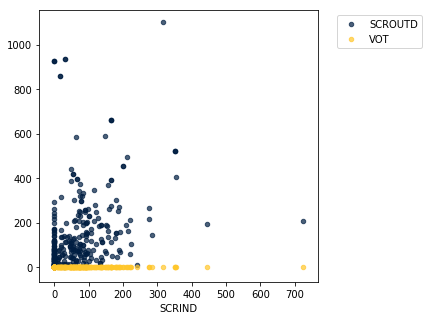

In [102]:
tab2_2.scatter('SCRIND')